In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv(r"C:\Users\nandh\Downloads\archive (4)\Mall_Customers.csv")

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.drop('CustomerID',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
df.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [7]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
df.tail()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18
199,Male,30,137,83


In [9]:
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no Null Values

In [10]:
df.duplicated().sum()

0

There are no duplicates()

## VISUALIZATION

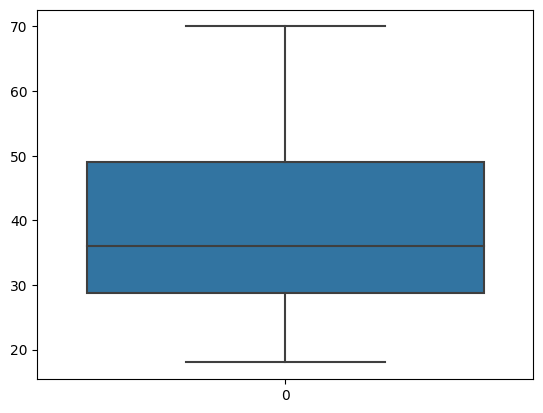

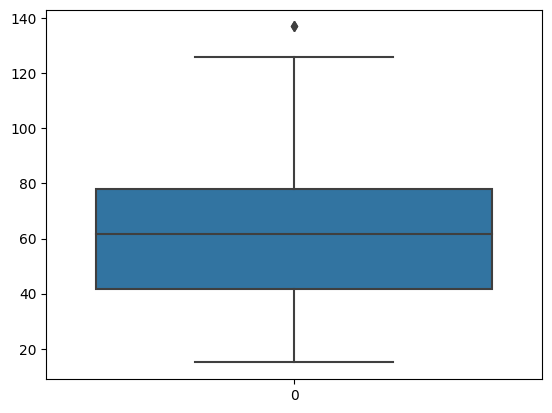

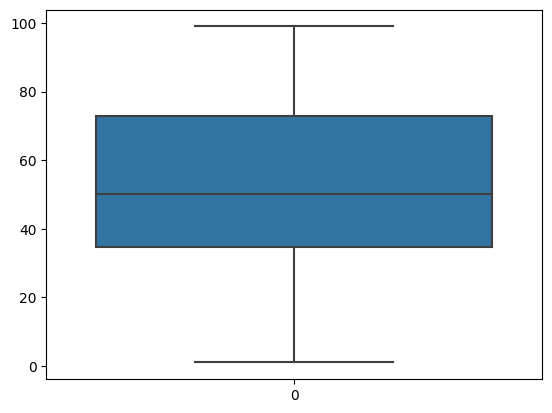

In [11]:
lst=['Age','Annual Income (k$)','Spending Score (1-100)']
for i in lst:
    sns.boxplot(df[i])
    plt.show()

Since the ouliers only very few we are doing nothing

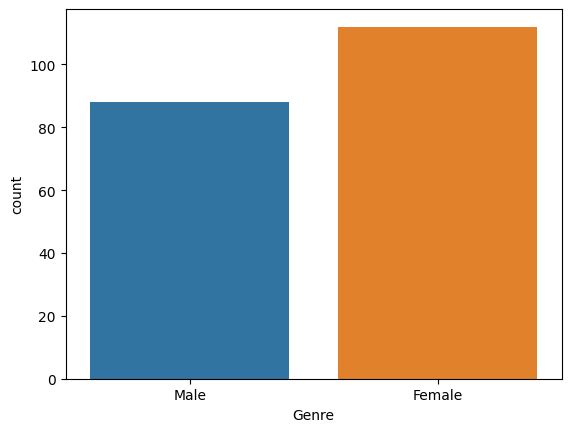

In [12]:
sns.countplot(x='Genre',data=df)
plt.show()

Here there is data imbalance

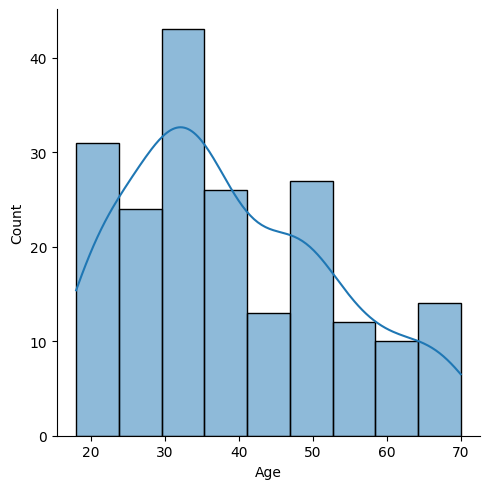

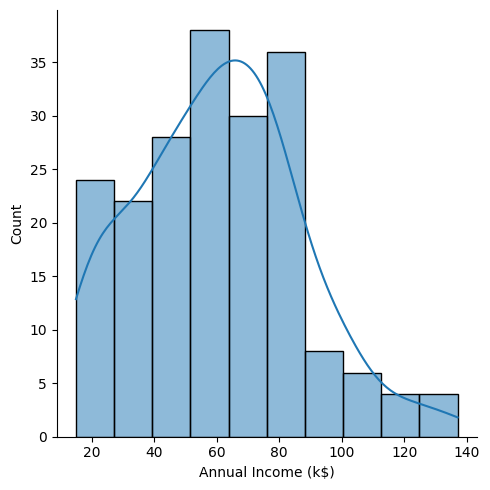

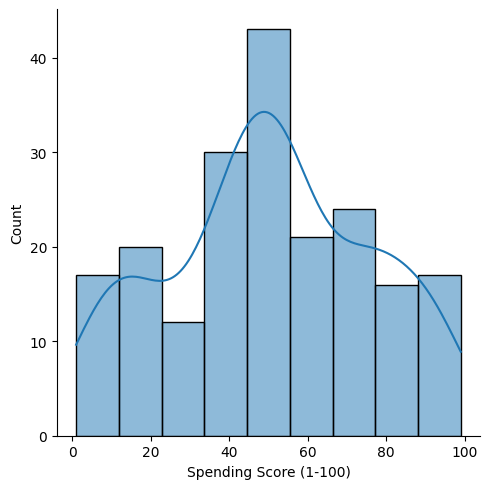

In [13]:
for i in lst:
    sns.displot(df[i],kde=True)

Most of the customers has Spending score ranging between 40 to 60


In [14]:
df.skew()

C:\Users\nandh\AppData\Local\Temp\ipykernel_15972\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

Spending Hours is negatively skewed

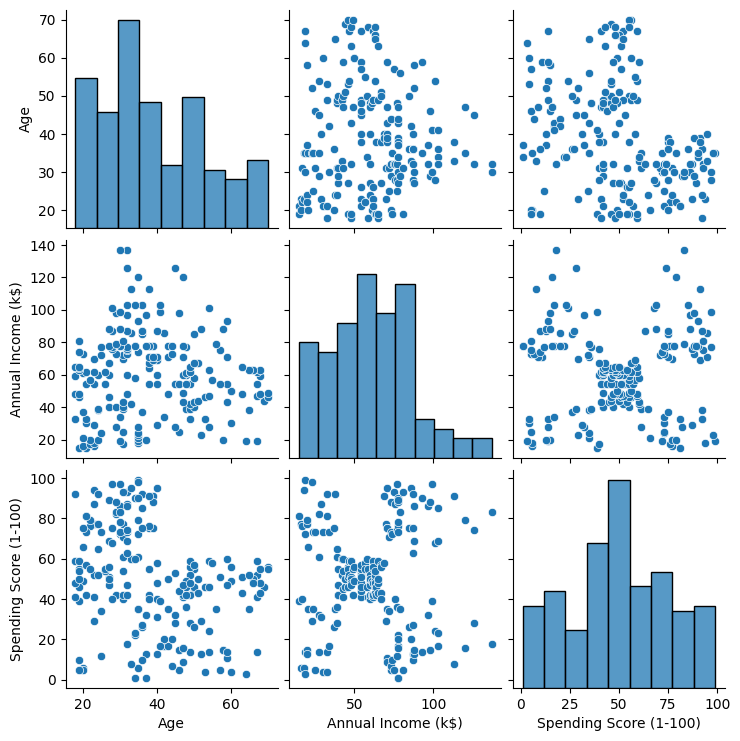

In [15]:
sns.pairplot(df)
plt.show()

In [16]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
Encoder=LabelEncoder()
df['Genre']=Encoder.fit_transform(df['Genre'])

In [19]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


# MODEL

In [20]:
import warnings
warnings.filterwarnings("ignore")
ssd = []
for n in range(1,10):
    kmeans = KMeans(n_clusters=n, max_iter=50)
    kmeans.fit(df)
    ssd.append(kmeans.inertia_)

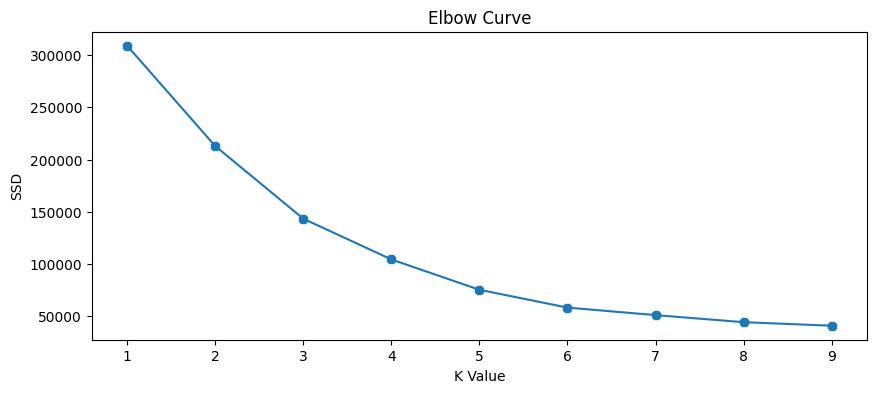

In [21]:
plt.figure(figsize=(10,4))
plt.plot(range(1,10), ssd, marker ="8")
plt.title("Elbow Curve")
plt.xlabel("K Value")
plt.ylabel("SSD")
plt.show()

### number of clusters=5

In [22]:
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(df)

KMeans(max_iter=50, n_clusters=5)

In [23]:
df['Cluster']=kmeans.labels_

In [24]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,0
196,0,45,126,28,1
197,1,32,126,74,0
198,1,32,137,18,1


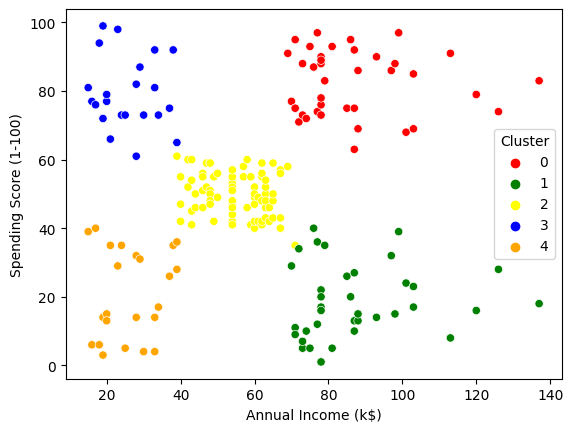

In [27]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster',palette=['red','green','yellow','blue','orange'])
plt.show()